<a id="1"></a>
# <div style="padding:20px;color:#ffffff; margin:0; font-size:35px; font-family:Georgia; text-align:left; display:fill; border-radius:5px; background-color:#254E58;overflow:hidden"><b>Preprocessing</b></div>


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Import</b></h2>


In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_module import make_dataset
print("Setup Complete!")

Setup Complete!


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Exploring</b></h2>


> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Read raw data from file</b></span>

In [2]:
raw_train_path = '../data/raw/train.csv'
raw_test_path = '../data/raw/test.csv'

raw_train_df = make_dataset.saveCSV2DataFrame(raw_train_path)
raw_test_df = make_dataset.saveCSV2DataFrame(raw_test_path)

In [3]:
# TEST
raw_train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
raw_test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
del raw_train_df['PassengerId'], raw_test_df['PassengerId']
del raw_train_df['Name'], raw_test_df['Name']

> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
How many rows and how many columns does the raw data have?</b></span>

In [6]:
shape = raw_train_df.shape

In [7]:
# TEST
print(f"Current shape: {shape}")

if shape[0] > 1000:
    print(f"Your data good!.")
else:
    print(f"Your raw data absolutely small. Please choose larger year interval.!")

Current shape: (8693, 12)
Your data good!.


> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
What does each line mean? Does it matter if the lines have different meanings? </b></span>

[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 
TODO: Your observation
</span>





> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Does the raw data have duplicate rows? </b></span>

In [8]:
index = raw_train_df.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

In [9]:
if num_duplicated_rows == 0:
    print(f"Your raw data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Your raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Your raw data have no duplicated line.!


In [10]:
# De-deduplicate your raw data
if num_duplicated_rows > 0:
    raw_train_df = raw_train_df.drop_duplicates(keep='first')
    print('Shape after de-deduplicate: ', raw_train_df.shape)

> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
What does each column mean? </b></span>

In [11]:
# col_meaning_df = pd.read_csv('../data/external/... .csv')
# col_meaning_df.set_index('Query API', inplace=True)
# pd.set_option('display.max_colwidth', 350)

In [12]:
# # TEST
# col_meaning_df


> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
What data type does each column currently have? Are there any columns whose data types are not suitable for further processing? </b></span>

In [13]:
dtypes = raw_train_df.dtypes

In [14]:
# TEST
dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 
TODO: Your observation
</span>

> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
For each column with numeric data type, how are the values distributed?  </b></span>

In [15]:
num_col_info_train_df = raw_train_df.select_dtypes(exclude=['object', 'bool'])
num_col_info_test_df = raw_test_df.select_dtypes(exclude=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

num_col_info_train_df = num_col_info_train_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_test_df = num_col_info_test_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

In [16]:
num_col_info_train_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
missing_ratio,2.1,2.1,2.1,2.4,2.1,2.2
min,0.0,0.0,0.0,0.0,0.0,0.0
lower_quartile,19.0,0.0,0.0,0.0,0.0,0.0
median,27.0,0.0,0.0,0.0,0.0,0.0
upper_quartile,38.0,47.0,76.0,27.0,59.0,46.0
max,79.0,14327.0,29813.0,23492.0,22408.0,24133.0


In [17]:
num_col_info_test_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
missing_ratio,2.1,1.9,2.5,2.3,2.4,1.9
min,0.0,0.0,0.0,0.0,0.0,0.0
lower_quartile,19.0,0.0,0.0,0.0,0.0,0.0
median,26.0,0.0,0.0,0.0,0.0,0.0
upper_quartile,37.0,53.0,78.0,33.0,50.0,36.0
max,79.0,11567.0,25273.0,8292.0,19844.0,22272.0


In [18]:
# YOUR CODE HERE (Optional)
# You can use Matplotlib to visualize this table for more intuitive

In [19]:
print(dict(num_col_info_train_df.iloc[0]))
print(dict(num_col_info_test_df.iloc[0]))

{'Age': 2.1, 'RoomService': 2.1, 'FoodCourt': 2.1, 'ShoppingMall': 2.4, 'Spa': 2.1, 'VRDeck': 2.2}
{'Age': 2.1, 'RoomService': 1.9, 'FoodCourt': 2.5, 'ShoppingMall': 2.3, 'Spa': 2.4, 'VRDeck': 1.9}


> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
For each column with a non-numeric data type, how are the values distributed?</b></span>


[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 
For non-numeric columns in a Pandas DataFrame, calculate the following:

- Percentage of missing values: This is the percentage of values in the column that are missing, from 0 to 100.
- Number of unique values: This is the number of different values in the column, excluding missing values. For categorical columns, this is the same as the number of categories.
- Percentage of each value: This is the percentage of each unique value in the column, sorted by decreasing percentage. Missing values are excluded from this calculation.

To calculate the percentage of each value, you can use a dictionary to store the results, where the key is the value and the value is the percentage. For categorical columns, the method is the same.

Save the results to a Pandas DataFrame called cat_col_info_df, with the following columns:

- Column name: The name of the non-numeric column in the original DataFrame (raw_df)
- missing_ratio: The percentage of missing values in the column
- num_values: The number of unique values in the column, excluding missing values
- value_ratios: A dictionary of the percentage of each unique value in the column, sorted by decreasing percentage

To improve readability, round all values to one decimal place using the .round(1) method.
</span>

In [20]:
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [21]:
cat_col_info_df = raw_train_df.select_dtypes(include='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    s = s.astype(str).str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.astype(str).str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,HomePlanet,CryoSleep,Cabin,Destination,VIP
missing_ratio,2.3,2.5,2.3,2.1,2.3
num_values,4,3,6561,4,3
value_ratios,"{'Earth': 52.9, 'Europa': 24.5, 'Mars': 20.2, 'nan': 2.3}","{'False': 62.6, 'True': 34.9, 'nan': 2.5}","{'nan': 2.3, 'G/734/S': 0.1, 'C/137/S': 0.1, 'B/201/P': 0.1, 'G/109/P': 0.1, 'G/981/S': 0.1, 'D/...","{'TRAPPIST-1e': 68.0, '55 Cancri e': 20.7, 'PSO J318.5-22': 9.2, 'nan': 2.1}","{'False': 95.4, 'nan': 2.3, 'True': 2.3}"


In [22]:
# YOUR CODE HERE (Optional)
# You can use Matplotlib to visualize this table for more intuitive

[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 
After identifying the basic statistical numbers that describe your data, we further need to determine the features that have a large number of missing values. Such features are not useful for the analysis stage and must be removed from the dataset.

Depending on your goals, the threshold for "large" can be defined. Usually, if the percentage of missing values is greater than 75%, the column is dropped from the dataframe and an updated dataframe is returned.
</span>

In [23]:
def drop_missing_features(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_train_df.iloc[0]), threshold: float = 75.0) -> pd.DataFrame:
    """Drop missing features from Pandas dataframe base on given threshold.

    Args:
        df (pd.DataFrame): Input dataframe for processing.
        missing_lst (dict, optional): Dict missing value rate which calculated from previous stage. Defaults to dict(num_col_info_df.iloc[0]).
        threshold (float, optional): User threshold for dropping. Defaults to 75.0.

    Returns:
        pd.DataFrame: Updated dataframe
    """
    if (df is None) or (missing_lst is None) or (threshold is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # List to maintain the columns to drop
    cols_to_trim = []
    
    for key, value in missing_lst.items():
        if float(value) > threshold:
            cols_to_trim.append(key)
            
    if len(cols_to_trim) > 0:
        # drop the columns identified using the dataframe drop() method
        df_cp = df_cp.drop(columns=cols_to_trim)
        print("[LOG] Dropped column(s): " + " ".join(cols_to_trim))
    else:
        print("[LOG] Have no column(s) to trim.")
        
    return df_cp

In [24]:
raw_train_df = drop_missing_features(raw_train_df, dict(num_col_info_train_df.iloc[0]))
raw_test_df = drop_missing_features(raw_test_df, dict(num_col_info_test_df.iloc[0]))

[LOG] Have no column(s) to trim.
[LOG] Have no column(s) to trim.


In [25]:
# TEST
raw_train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True



[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 
After remove features which have large missing values, our dataframe still have missing values. So that, we need to fill these missing values so that they can be used in analysis.
</span>

In [26]:
def filling_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    """Filling missing features from Pandas dataframe
    
    The first, you need to replace all None values with NaN, fillna only works on nans.
    
    After that, you replace all NaN values with the mean of the column values.

    Args:
        df (pd.DataFrame): Input dataframe for processing.

    Returns:
        pd.DataFrame: Updated dataframe
    """
    if (df is None):
        print(f"[LOG] Invalid.")
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    # Get the list of columns in the dataframe
    cols_list = list(df_cp.columns)
    
    # Replace all None values with NaN, fillna only works on nans
    df_cp.fillna(value=np.nan, inplace=True)
    
    # Replace all NaN values with the mean of the column values
    for col in cols_list:
        if df_cp[col].dtype in ['object', 'bool']:
            df_cp[col].fillna((df_cp[col].mode()[0]), inplace=True)
        elif df_cp[col].dtype in ['int64', 'float64']:
            df_cp[col].fillna((df_cp[col].mean()), inplace=True)
        
    return df_cp
    

In [27]:
raw_train_df = filling_missing_value(df=raw_train_df)
raw_test_df = filling_missing_value(df=raw_test_df)

In [28]:
# TEST
print("Train data: ")
print(raw_train_df.select_dtypes(exclude=['object', 'bool']).agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]))
print("\nTest data: ")
print(raw_test_df.select_dtypes(exclude=['object', 'bool']).agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]))

Train data: 
                 Age  RoomService  FoodCourt  ShoppingMall      Spa   VRDeck
missing_ratio    0.0          0.0        0.0           0.0      0.0      0.0
min              0.0          0.0        0.0           0.0      0.0      0.0
lower_quartile  20.0          0.0        0.0           0.0      0.0      0.0
median          27.0          0.0        0.0           0.0      0.0      0.0
upper_quartile  37.0         78.0      118.0          45.0     89.0     71.0
max             79.0      14327.0    29813.0       23492.0  22408.0  24133.0

Test data: 
                 Age  RoomService  FoodCourt  ShoppingMall      Spa   VRDeck
missing_ratio    0.0          0.0        0.0           0.0      0.0      0.0
min              0.0          0.0        0.0           0.0      0.0      0.0
lower_quartile  20.0          0.0        0.0           0.0      0.0      0.0
median          27.0          0.0        0.0           0.0      0.0      0.0
upper_quartile  37.0         79.0      143.0      

In [29]:
print("Train data: ")
raw_train_df.select_dtypes(include=['object', 'bool']).agg([missing_ratio, num_values, value_ratios])

Train data: 


,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_values,3,2,6560,3,2,2
value_ratios,"{'Earth': 55.3, 'Europa': 24.5, 'Mars': 20.2}","{'False': 65.1, 'True': 34.9}","{'G/734/S': 2.4, 'C/21/P': 0.1, 'B/201/P': 0.1, 'G/1368/P': 0.1, 'E/13/S': 0.1, 'G/1476/S': 0.1,...","{'TRAPPIST-1e': 70.1, '55 Cancri e': 20.7, 'PSO J318.5-22': 9.2}","{'False': 97.7, 'True': 2.3}","{'True': 50.4, 'False': 49.6}"


In [30]:
print("Test data: ")
raw_test_df.select_dtypes(include=['object', 'bool']).agg([missing_ratio, num_values, value_ratios])

Test data: 


,HomePlanet,CryoSleep,Cabin,Destination,VIP
missing_ratio,0.0,0.0,0.0,0.0,0.0
num_values,3,2,3265,3,2
value_ratios,"{'Earth': 54.9, 'Europa': 23.4, 'Mars': 21.6}","{'False': 63.9, 'True': 36.1}","{'G/160/P': 2.5, 'G/748/S': 0.2, 'E/228/S': 0.2, 'D/273/S': 0.2, 'B/31/P': 0.2, 'B/214/P': 0.1, ...","{'TRAPPIST-1e': 71.3, '55 Cancri e': 19.7, 'PSO J318.5-22': 9.1}","{'False': 98.3, 'True': 1.7}"


> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Data Transformation</b></span>

In [31]:
cabin_form = ['Deck', 'Num', 'Side']
raw_train_df[cabin_form] = raw_train_df['Cabin'].str.split('/', expand=True)
raw_test_df[cabin_form] = raw_test_df['Cabin'].str.split('/', expand=True)

In [32]:
raw_train_df['Age'] = raw_train_df['Age'].astype(int)
raw_train_df['AgeGroup'] = pd.cut(raw_train_df['Age'], bins=[-1, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Elder'])
raw_test_df['AgeGroup'] = pd.cut(raw_test_df['Age'], bins=[-1, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Elder'])

In [33]:
# amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# amenities_indices = raw_train_df.columns.get_indexer(amenities).tolist()
# raw_train_df['Spending'] = raw_train_df.iloc[:, amenities_indices].sum(axis=1).astype('float64')
# raw_test_df['Spending'] = raw_test_df.iloc[:, amenities_indices].sum(axis=1).astype('float64')

In [34]:
amenities = {
    'RoomService': 'Room',
    'FoodCourt': 'Food',
    'ShoppingMall': 'Shopping',
    'Spa': 'Spa',
    'VRDeck': 'VR'
}

raw_train_df.rename(columns=amenities, inplace=True)
raw_test_df.rename(columns=amenities, inplace=True)

In [35]:
raw_train_df.dtypes

HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age               int32
VIP                bool
Room            float64
Food            float64
Shopping        float64
Spa             float64
VR              float64
Transported        bool
Deck             object
Num              object
Side             object
AgeGroup       category
dtype: object

In [36]:
selected_features = ['HomePlanet', 'CryoSleep', 'Deck', 'Side', 'AgeGroup', 'Destination', 'VIP', 'Room', 'Food', 'Shopping', 'Spa', 'VR', 'Transported']
raw_train_df = raw_train_df[selected_features]
raw_test_df = raw_test_df[selected_features[:-1]]

> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Is the collected data reasonable?</b></span>


[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana; color: #ffffff;"> 
TODO
</span>

> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Save your processed data</b></span>

In [37]:
print(f"Total number of features: {raw_train_df.shape[1]}")
raw_train_df.dtypes

Total number of features: 13


HomePlanet       object
CryoSleep          bool
Deck             object
Side             object
AgeGroup       category
Destination      object
VIP                bool
Room            float64
Food            float64
Shopping        float64
Spa             float64
VR              float64
Transported        bool
dtype: object

<a id="1"></a>
# <div style="padding:20px;color:#ffffff; margin:0; font-size:35px; font-family:Georgia; text-align:left; display:fill; border-radius:5px; background-color:#254E58;overflow:hidden"><b>Data modelling</b></div>


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Import</b></h2>


In [38]:
import sys, os
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


from sklearn.preprocessing import LabelEncoder, LabelBinarizer, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from src.feature_module import build_features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

print("Setup Complete!")

Setup Complete!


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Data preparation</b></h2>


> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Read dataset</b></span>

In [39]:
X_full = raw_train_df.copy()
X_test_full = raw_test_df.copy()

X_full.dropna(axis=0, subset=['Transported'], inplace=True)
y = X_full['Transported']
X_full.drop(['Transported'], axis=1, inplace=True)

In [40]:
X_full.head()

,HomePlanet,CryoSleep,Deck,Side,AgeGroup,Destination,VIP,Room,Food,Shopping,Spa,VR
0,Europa,False,B,P,Adult,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F,S,Adult,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A,S,Adult,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A,S,Adult,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F,S,Teenager,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0


> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Type of  dataset</b></span>

In [41]:
def convert_object_to_category(df):
    cat_columns = df.select_dtypes(include=['object']).columns.tolist()
    for column in cat_columns:
        df[column] = df[column].astype('category')
    return df

X_full = convert_object_to_category(X_full)
X_test_full = convert_object_to_category(X_test_full)

In [42]:
category_features = X_full.select_dtypes(include=['category']).columns.tolist()
numeric_features = X_full.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Category Features: ", category_features)
print("Numeric Features: ", numeric_features)

Category Features:  ['HomePlanet', 'Deck', 'Side', 'AgeGroup', 'Destination']
Numeric Features:  ['Room', 'Food', 'Shopping', 'Spa', 'VR']


> <span style='font-size:15px; font-family:Verdana; color: #ffffff;'><b>
Feature encoding</b></span>

In [43]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
import pandas as pd

def ordinal_encode(df_train, df_test, category_features):
    encoder = OrdinalEncoder()
    for feature in category_features:
        df_train[feature] = encoder.fit_transform(df_train[[feature]]).astype(int)
        df_test[feature] = encoder.transform(df_test[[feature]]).astype(int)
    return df_train, df_test

def one_hot_encode(df_train, df_test, category_features):
    df_train = pd.get_dummies(df_train, columns=category_features, prefix=category_features, drop_first=True)
    df_test = pd.get_dummies(df_test, columns=category_features, prefix=category_features, drop_first=True)
    return df_train, df_test

def scale_features(df_train, df_test, numeric_features):
    scaler = MinMaxScaler()
    for feature in numeric_features:
        df_train[feature] = scaler.fit_transform(df_train[feature].values.reshape(-1, 1))
        df_test[feature] = scaler.transform(df_test[feature].values.reshape(-1, 1))
    return df_train, df_test


X_full, X_test_full = ordinal_encode(X_full, X_test_full, ['AgeGroup'])
category_features.remove('AgeGroup')
X_full, X_test_full = one_hot_encode(X_full, X_test_full, category_features)
X_full, X_test_full = scale_features(X_full, X_test_full, numeric_features)

In [44]:
X_full.head()

,CryoSleep,AgeGroup,VIP,Room,Food,Shopping,Spa,VR,HomePlanet_Europa,HomePlanet_Mars,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,0,False,0.000000,0.000000,0.000000,0.000000,0.000000,True,False,True,False,False,False,False,False,False,False,False,True
1,False,0,False,0.007608,0.000302,0.001064,0.024500,0.001823,False,False,False,False,False,False,True,False,False,True,False,True
2,False,0,True,0.003001,0.119948,0.000000,0.299670,0.002030,True,False,False,False,False,False,False,False,False,True,False,True
3,False,0,False,0.000000,0.043035,0.015793,0.148563,0.007997,True,False,False,False,False,False,False,False,False,True,False,True
4,False,3,False,0.021149,0.002348,0.006428,0.025214,0.000083,False,False,False,False,False,False,True,False,False,True,False,True


In [45]:
# labels = ['Low', 'Low to Medium', 'Medium to High', 'High']
# for feature in numeric_features:
#     X_full[feature] = pd.qcut(X_full[feature].rank(method='first').values, q=4, labels=labels).astype(str)
#     X_test_full[feature] = pd.qcut(X_test_full[feature].rank(method='first').values, q=4, labels=labels).astype(str)
 
# X_full, X_test_full = ordinal_encode(X_full, X_test_full, numeric_features)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

bool_cols = X_full.columns[X_full.dtypes == 'bool'].tolist()

X_full[bool_cols] = X_full[bool_cols].astype(int)
X_test_full[bool_cols] = X_test_full[bool_cols].astype(int)

def calc_vif(X):
    # Calculating VIF
    vif_data = pd.DataFrame() 
    vif_data["feature"] = X.columns 
    
    # calculating VIF for each feature 
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                            for i in range(len(X.columns))]
    return vif_data

calc_vif(X_full)

,feature,VIF
0,CryoSleep,2.475663
1,AgeGroup,1.290588
2,VIP,1.081248
3,Room,1.296392
4,Food,1.383998
5,Shopping,1.160638
6,Spa,1.242658
7,VR,1.256374
8,HomePlanet_Europa,4.921640
9,HomePlanet_Mars,2.147003




<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Feature engineering</b></h2>


In [47]:
y.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [48]:
corr = X_full.corr()
corr.head()

,CryoSleep,AgeGroup,VIP,Room,Food,Shopping,Spa,VR,HomePlanet_Europa,HomePlanet_Mars,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
CryoSleep,1.000000,0.091174,-0.078281,-0.243986,-0.205682,-0.206366,-0.198392,-0.193107,0.093395,0.032715,0.124049,0.028433,-0.066678,-0.110644,-0.220150,0.243898,-0.017579,0.023858,0.087764,-0.113380
AgeGroup,0.091174,1.000000,-0.060777,-0.028376,-0.086039,-0.002679,-0.053153,-0.073690,-0.114605,-0.030443,-0.024727,-0.080859,-0.044822,-0.029992,0.003253,0.121862,-0.012018,0.016322,0.038485,-0.019590
VIP,-0.078281,-0.060777,1.000000,0.056595,0.126006,0.018483,0.060573,0.123092,0.147008,0.043523,0.065080,0.065591,0.067678,-0.012912,-0.057578,-0.094426,-0.003672,-0.008798,-0.000592,-0.039617
Room,-0.243986,-0.028376,0.056595,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.067476,0.245451,-0.065054,-0.020154,0.161068,0.043695,0.085965,-0.133363,0.007364,-0.007503,-0.062828,0.061098
Food,-0.205682,-0.086039,0.126006,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.365500,-0.124781,0.155090,0.258588,0.019991,-0.039410,-0.131662,-0.146951,0.014134,0.019602,-0.065542,-0.078216


In [49]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False

selected_columns = X_full.columns[columns]
selected_columns.shape

(20,)

In [50]:
import statsmodels.api as sm

def backward_elimination(X, y, sl, columns):
    num_vars = X.shape[1]
    indices = np.arange(num_vars)
    for _ in range(num_vars):
        if X.size == 0 or indices.size == 0:
            break
        regressor_OLS = sm.OLS(y, X).fit()
        max_p_value = max(regressor_OLS.pvalues)
        if max_p_value > sl:
            max_p_value_index = regressor_OLS.pvalues.argmax()
            X = np.delete(X, max_p_value_index, 1)
            indices = np.delete(indices, max_p_value_index)
    regressor_OLS.summary()
    return X, indices

SL = 0.05
data_modeled, selected_indices = backward_elimination(X_full.values, y.values, SL, selected_columns.values)

# Select the corresponding columns from X_full and X_test_full
X_full_correlation = X_full.iloc[:, selected_indices]
X_test_full_correlation = X_test_full.iloc[:, selected_indices]

In [51]:
X_full_correlation.head()

,CryoSleep,AgeGroup,Room,Food,Shopping,Spa,VR,HomePlanet_Europa,HomePlanet_Mars,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Side_S,Destination_TRAPPIST-1e
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,0,1
1,0,0,0.007608,0.000302,0.001064,0.024500,0.001823,0,0,0,0,0,0,1,0,1,1
2,0,0,0.003001,0.119948,0.000000,0.299670,0.002030,1,0,0,0,0,0,0,0,1,1
3,0,0,0.000000,0.043035,0.015793,0.148563,0.007997,1,0,0,0,0,0,0,0,1,1
4,0,3,0.021149,0.002348,0.006428,0.025214,0.000083,0,0,0,0,0,0,1,0,1,1


In [52]:
X_test_full_correlation.head()

,CryoSleep,AgeGroup,Room,Food,Shopping,Spa,VR,HomePlanet_Europa,HomePlanet_Mars,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Side_S,Destination_TRAPPIST-1e
0,1,0,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0,0,0,0,1,1,1
1,0,0,0.000000,0.000302,0.00000,0.125982,0.000000,0,0,0,0,0,0,1,0,1,1
2,1,0,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0,1,0,0,0,0,1,0
3,0,0,0.000000,0.223124,0.00000,0.008077,0.024241,1,0,0,1,0,0,0,0,1,1
4,0,0,0.000698,0.000000,0.02703,0.000000,0.000000,0,0,0,0,0,0,1,0,1,1


In [53]:
forward_feature_selection = SFS(RandomForestClassifier(n_jobs=1), 
           k_features=(1, 20), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5).fit(np.array(X_full), y)


[2023-11-11 09:01:46] Features: 1/20 -- score: 0.7182813423319752
[2023-11-11 09:02:28] Features: 2/20 -- score: 0.735882625028868
[2023-11-11 09:02:57] Features: 3/20 -- score: 0.7359977660004592
[2023-11-11 09:03:45] Features: 4/20 -- score: 0.7404831024006893
[2023-11-11 09:05:01] Features: 5/20 -- score: 0.7403680937750423
[2023-11-11 09:05:44] Features: 6/20 -- score: 0.7403680937750423
[2023-11-11 09:06:20] Features: 7/20 -- score: 0.7408279959316857
STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
forward_feature_selection.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)

In [ ]:
forward_selected_features = X_full.columns[list(forward_feature_selection.k_feature_idx_)].tolist()
print(forward_selected_features)

['CryoSleep', 'AgeGroup', 'VIP', 'Room', 'Food', 'Shopping', 'Spa', 'VR', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']


In [ ]:
forward_feature_selection.k_score_

0.7943196458951914

In [ ]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.7084531339850488, 0.718803910293272, 0.7078...",0.718281,"(0,)",0.012155,0.009457,0.004728
2,"(0, 1)","[0.7268545140885566, 0.7360552041403106, 0.717...",0.735883,"(0, 1)",0.016496,0.012834,0.006417
3,"(0, 1, 11)","[0.7274295572167913, 0.7372052903967797, 0.716...",0.736343,"(0, 1, 11)",0.016909,0.013156,0.006578
4,"(0, 1, 11, 17)","[0.7326049453709028, 0.7464059804485337, 0.722...",0.740368,"(0, 1, 11, 17)",0.014961,0.01164,0.00582
5,"(0, 1, 11, 12, 17)","[0.7326049453709028, 0.7464059804485337, 0.722...",0.740253,"(0, 1, 11, 12, 17)",0.015185,0.011814,0.005907
6,"(0, 1, 11, 12, 16, 17)","[0.7326049453709028, 0.7464059804485337, 0.722...",0.740483,"(0, 1, 11, 12, 16, 17)",0.015002,0.011672,0.005836
7,"(0, 1, 11, 12, 14, 16, 17)","[0.7326049453709028, 0.7464059804485337, 0.722...",0.740483,"(0, 1, 11, 12, 14, 16, 17)",0.015002,0.011672,0.005836
8,"(0, 1, 9, 11, 12, 14, 16, 17)","[0.7303047728579644, 0.7446808510638298, 0.726...",0.740253,"(0, 1, 9, 11, 12, 14, 16, 17)",0.014364,0.011176,0.005588
9,"(0, 1, 8, 9, 11, 12, 14, 16, 17)","[0.7285796434732605, 0.7446808510638298, 0.726...",0.739793,"(0, 1, 8, 9, 11, 12, 14, 16, 17)",0.014363,0.011175,0.005587
10,"(0, 1, 8, 9, 11, 12, 13, 14, 16, 17)","[0.7257044278320874, 0.745830937320299, 0.7262...",0.739448,"(0, 1, 8, 9, 11, 12, 13, 14, 16, 17)",0.015673,0.012194,0.006097


In [ ]:
X_full_forward = X_full[forward_selected_features]
X_test_full_forward = X_test_full[forward_selected_features]

In [ ]:
X_full_forward.head()

,CryoSleep,AgeGroup,VIP,Room,Food,Shopping,Spa,VR,HomePlanet_Europa,HomePlanet_Mars,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0.007608,0.000302,0.001064,0.024500,0.001823,0,0,0,0,0,0,1,0,0,1,0,1
2,0,0,1,0.003001,0.119948,0.000000,0.299670,0.002030,1,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0.000000,0.043035,0.015793,0.148563,0.007997,1,0,0,0,0,0,0,0,0,1,0,1
4,0,3,0,0.021149,0.002348,0.006428,0.025214,0.000083,0,0,0,0,0,0,1,0,0,1,0,1


In [ ]:
X_test_full_forward.head()

,CryoSleep,AgeGroup,VIP,Room,Food,Shopping,Spa,VR,HomePlanet_Europa,HomePlanet_Mars,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,1,0,1
1,0,0,0,0.000000,0.000302,0.00000,0.125982,0.000000,0,0,0,0,0,0,1,0,0,1,0,1
2,1,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0.000000,0.223124,0.00000,0.008077,0.024241,1,0,0,1,0,0,0,0,0,1,0,1
4,0,0,0,0.000698,0.000000,0.02703,0.000000,0.000000,0,0,0,0,0,0,1,0,0,1,0,1


In [ ]:
backward_feature_selection = SFS(RandomForestClassifier(n_jobs=1), 
                                k_features=(1, 20), 
                                forward=False, 
                                floating=False, 
                                verbose=2,
                                scoring='accuracy',
                                cv=5).fit(np.array(X_full), y)


[2023-11-07 19:45:36] Features: 19/1 -- score: 0.799840986347854
[2023-11-07 19:48:02] Features: 18/1 -- score: 0.8003011531963862
[2023-11-07 19:50:20] Features: 17/1 -- score: 0.7986905030535518
[2023-11-07 19:52:36] Features: 16/1 -- score: 0.7989205203048456
[2023-11-07 19:54:30] Features: 15/1 -- score: 0.7983452124847223
[2023-11-07 19:56:17] Features: 14/1 -- score: 0.7990354627575204
[2023-11-07 19:57:58] Features: 13/1 -- score: 0.7986901721886909
[2023-11-07 19:59:38] Features: 12/1 -- score: 0.7951247724476918
[2023-11-07 20:01:27] Features: 11/1 -- score: 0.7936294617953654
[2023-11-07 20:04:01] Features: 10/1 -- score: 0.7882226005845719
[2023-11-07 20:06:12] Features: 9/1 -- score: 0.7876482191860592
[2023-11-07 20:08:19] Features: 8/1 -- score: 0.7884528825277546
[2023-11-07 20:10:06] Features: 7/1 -- score: 0.7861521806310386
[2023-11-07 20:11:46] Features: 6/1 -- score: 0.7873031933091185
[2023-11-07 20:13:07] Features: 5/1 -- score: 0.7861516512472612
[2023-11-07 20:

In [ ]:
backward_selected_features = X_full.columns[list(backward_feature_selection.k_feature_idx_)].tolist()
print(backward_selected_features)

['CryoSleep', 'AgeGroup', 'VIP', 'Room', 'Food', 'Shopping', 'Spa', 'VR', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'Destination_TRAPPIST-1e']


In [ ]:
backward_feature_selection.k_score_

0.8003011531963862

In [ ]:
pd.DataFrame.from_dict(backward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7780333525014376, 0.7883841288096607, 0.803...",0.796275,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.01689,0.013141,0.00657
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7768832662449684, 0.8004600345025877, 0.804...",0.799841,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.020268,0.015769,0.007885
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.7843588269120184, 0.7941345600920069, 0.804...",0.800301,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.014191,0.011041,0.005521
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.7843588269120184, 0.7906843013225991, 0.804...",0.798691,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...",0.01484,0.011546,0.005773
16,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15...","[0.7843588269120184, 0.7906843013225991, 0.805...",0.798921,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15...",0.01585,0.012332,0.006166
15,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17...","[0.7878090856814262, 0.78953421506613, 0.80276...",0.798345,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17...",0.013138,0.010221,0.005111
14,"(0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 17, 19)","[0.7924094307073031, 0.7889591719378953, 0.800...",0.799035,"(0, 1, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 17, 19)",0.013556,0.010547,0.005273
13,"(0, 1, 3, 4, 5, 6, 7, 8, 11, 12, 14, 17, 19)","[0.7889591719378953, 0.7958596894767107, 0.797...",0.79869,"(0, 1, 3, 4, 5, 6, 7, 8, 11, 12, 14, 17, 19)",0.012007,0.009342,0.004671
12,"(0, 1, 3, 4, 5, 6, 7, 8, 11, 14, 17, 19)","[0.7860839562967222, 0.7860839562967222, 0.793...",0.795125,"(0, 1, 3, 4, 5, 6, 7, 8, 11, 14, 17, 19)",0.012707,0.009886,0.004943
11,"(0, 1, 3, 4, 5, 6, 7, 8, 14, 17, 19)","[0.7837837837837838, 0.7843588269120184, 0.791...",0.793629,"(0, 1, 3, 4, 5, 6, 7, 8, 14, 17, 19)",0.014168,0.011023,0.005511


In [ ]:
X_full_backward = X_full[backward_selected_features]
X_test_full_backward = X_test_full[backward_selected_features]

In [ ]:
X_full_backward.head()

,CryoSleep,AgeGroup,VIP,Room,Food,Shopping,Spa,VR,HomePlanet_Europa,HomePlanet_Mars,Deck_B,Deck_C,Deck_D,Deck_F,Deck_G,Deck_T,Side_S,Destination_TRAPPIST-1e
0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,0,1
1,0,0,0,0.007608,0.000302,0.001064,0.024500,0.001823,0,0,0,0,0,1,0,0,1,1
2,0,0,1,0.003001,0.119948,0.000000,0.299670,0.002030,1,0,0,0,0,0,0,0,1,1
3,0,0,0,0.000000,0.043035,0.015793,0.148563,0.007997,1,0,0,0,0,0,0,0,1,1
4,0,3,0,0.021149,0.002348,0.006428,0.025214,0.000083,0,0,0,0,0,1,0,0,1,1


In [ ]:
X_test_full_backward.head()

,CryoSleep,AgeGroup,VIP,Room,Food,Shopping,Spa,VR,HomePlanet_Europa,HomePlanet_Mars,Deck_B,Deck_C,Deck_D,Deck_F,Deck_G,Deck_T,Side_S,Destination_TRAPPIST-1e
0,1,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,1
1,0,0,0,0.000000,0.000302,0.00000,0.125982,0.000000,0,0,0,0,0,1,0,0,1,1
2,1,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0,1,0,0,0,0,1,0
3,0,0,0,0.000000,0.223124,0.00000,0.008077,0.024241,1,0,0,1,0,0,0,0,1,1
4,0,0,0,0.000698,0.000000,0.02703,0.000000,0.000000,0,0,0,0,0,1,0,0,1,1


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Training model</b></h2>


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv)
    return {'Scores': scores.round(3), 'Average Score': round(scores.mean(), 3), 'Scores Length': len(scores)}

models = {
    "Random Forest": RandomForestClassifier(criterion='log_loss', n_estimators=250),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(loss='exponential', n_estimators=52, max_depth=4, max_features='sqrt', subsample=0.9),
    "SVM": SVC(C=1, degree=4, gamma='auto', probability=True, tol=0.01),
    "Voting":  VotingClassifier(estimators=[('rf', RandomForestClassifier(criterion='log_loss', n_estimators=250)),
                                            ('gb', GradientBoostingClassifier(loss='exponential', n_estimators=52, max_depth=4, max_features='sqrt', subsample=0.9)),
                                            ('svc',SVC(C=1, degree=4, gamma='auto', probability=True, tol=0.01))], voting = 'hard')
}

In [ ]:
k_folds = KFold(n_splits = 5)
results = {name: evaluate_model(model, X_full_correlation, y, k_folds) for name, model in models.items()}

results_df = pd.DataFrame(results).T
results_df

,Scores,Average Score,Scores Length
Random Forest,"[0.781, 0.792, 0.803, 0.816, 0.8]",0.799,5
Decision Tree,"[0.722, 0.737, 0.763, 0.759, 0.745]",0.745,5
Gradient Boosting,"[0.788, 0.792, 0.798, 0.811, 0.807]",0.799,5
SVM,"[0.737, 0.753, 0.719, 0.727, 0.75]",0.737,5
Voting,"[0.782, 0.795, 0.795, 0.801, 0.81]",0.797,5


In [ ]:
k_folds = KFold(n_splits = 5)
results = {name: evaluate_model(model, X_full_forward, y, k_folds) for name, model in models.items()}

results_df = pd.DataFrame(results).T
results_df

,Scores,Average Score,Scores Length
Random Forest,"[0.782, 0.798, 0.799, 0.815, 0.798]",0.798,5
Decision Tree,"[0.728, 0.732, 0.767, 0.765, 0.742]",0.747,5
Gradient Boosting,"[0.779, 0.791, 0.8, 0.803, 0.802]",0.795,5
SVM,"[0.736, 0.746, 0.713, 0.723, 0.749]",0.733,5
Voting,"[0.784, 0.79, 0.788, 0.811, 0.801]",0.795,5


In [ ]:
k_folds = KFold(n_splits = 5)
results = {name: evaluate_model(model, X_full_backward, y, k_folds) for name, model in models.items()}

results_df = pd.DataFrame(results).T
results_df

,Scores,Average Score,Scores Length
Random Forest,"[0.784, 0.789, 0.804, 0.808, 0.797]",0.797,5
Decision Tree,"[0.731, 0.727, 0.764, 0.763, 0.731]",0.743,5
Gradient Boosting,"[0.781, 0.788, 0.794, 0.806, 0.806]",0.795,5
SVM,"[0.736, 0.749, 0.715, 0.727, 0.75]",0.735,5
Voting,"[0.784, 0.793, 0.787, 0.802, 0.806]",0.794,5


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Evaluation</b></h2>


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_full_correlation, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_valid: ', X_valid.shape)
print('Shape of y_valid: ', y_valid.shape)

Shape of X_train:  (6954, 17)
Shape of y_train:  (6954,)
Shape of X_valid:  (1739, 17)
Shape of y_valid:  (1739,)


In [ ]:
model = models['Random Forest']
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

cm = confusion_matrix(y_valid, y_pred) 
cm_df = pd.DataFrame(cm, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])
cm_df

,Predicted Positive,Predicted Negative
Actual Positive,693,170
Actual Negative,188,688


In [ ]:
from sklearn.metrics import classification_report as cls_report

clr = cls_report(y_valid, y_pred)
print(clr)

              precision    recall  f1-score   support

       False       0.79      0.80      0.79       863
        True       0.80      0.79      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
218/218 [==============================] - 4s 6ms/step - loss: 0.5264 - accuracy: 0.7331 - precision: 0.7807 - recall: 0.6536
Epoch 2/100
218/218 [==============================] - 1s 6ms/step - loss: 0.4552 - accuracy: 0.7738 - precision: 0.8063 - recall: 0.7250
Epoch 3/100
218/218 [==============================] - 1s 6ms/step - loss: 0.4326 - accuracy: 0.7849 - precision: 0.8052 - recall: 0.7556
Epoch 4/100
218/218 [==============================] - 1s 6ms/step - loss: 0.4201 - accuracy: 0.7941 - precision: 0.8012 - recall: 0.7861
Epoch 5/100
218/218 [==============================] - 1s 6ms/step - loss: 0.4181 - accuracy: 0.7951 - precision: 0.7997 - recall: 0.7913
Epoch 6/100
218/218 [==============================] - 1s 6ms/step - loss: 0.4131 - accuracy: 0.7978 - precision: 0.8048 - recall: 0.7901
Epoch 7/100
218/218 [==============================] - 1s 6ms/step - loss: 0.4099 - accuracy: 0.7964 - precision: 0.7992 - recall: 0.7955
Epoch 8/100
218/218 [=============

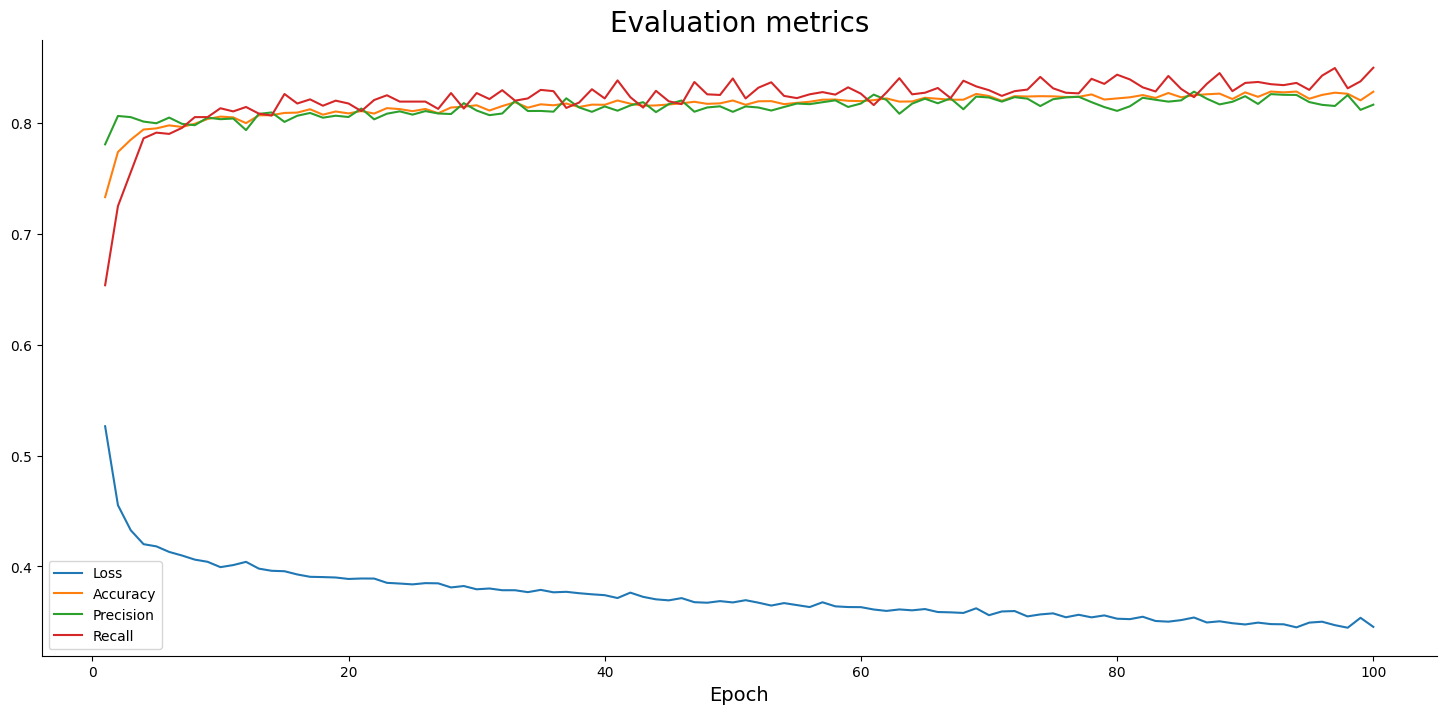

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [ ]:
predictions = model.predict(X_valid)
predictions

55/55 [==============================] - 1s 4ms/step


array([[0.26506516],
       [0.60314596],
       [0.2760671 ],
       ...,
       [0.652943  ],
       [0.05322042],
       [0.7798894 ]], dtype=float32)

ROC_AUC Score :  0.8869578617650015
Function for ROC_AUC Score :  0.8869578617650015
Threshold value is: 0.4909457


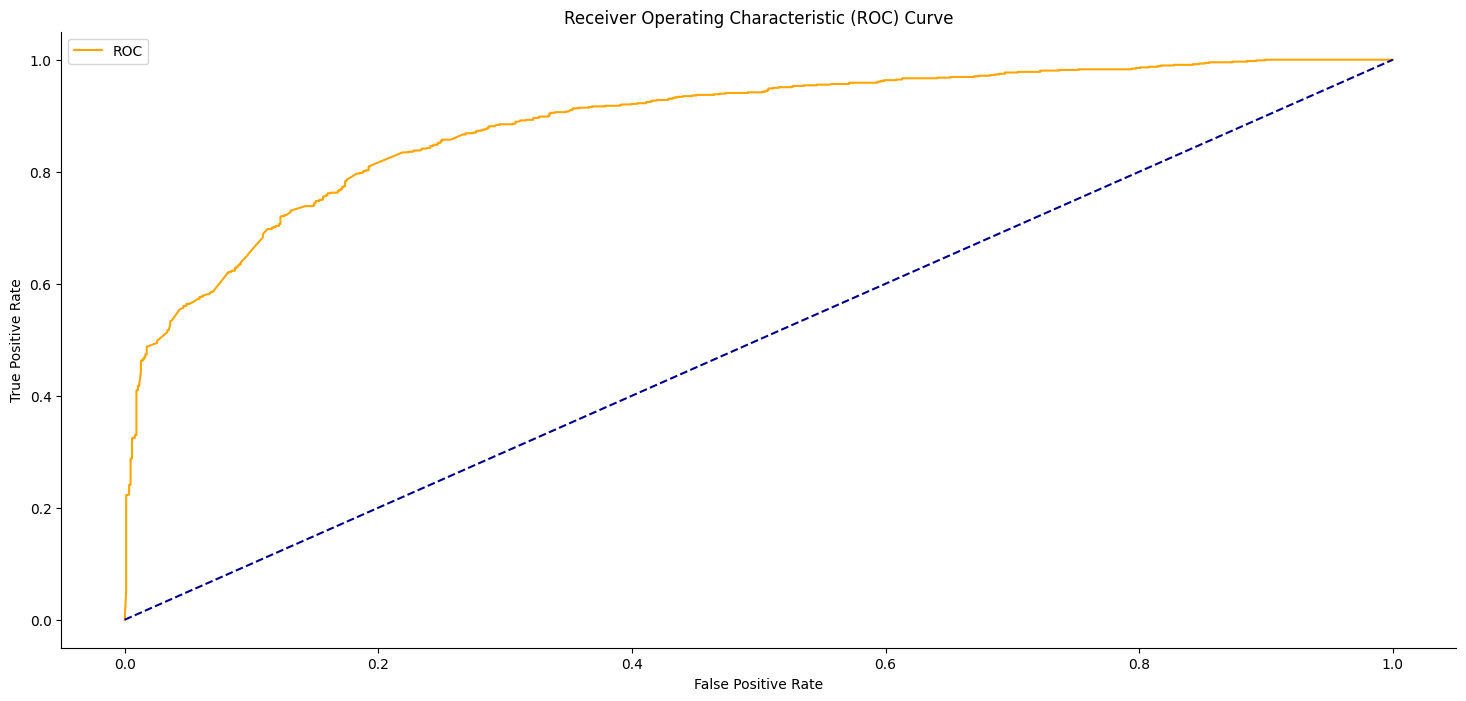

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(y_valid, predictions)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(y_valid, predictions)) # Function present
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [ ]:
prediction_classes = [
    1 if prob > optimal_threshold else 0 for prob in np.ravel(predictions)
]
prediction_classes[:20]

[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_valid, prediction_classes))

[[697 166]
 [168 708]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_valid, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_valid, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_valid, prediction_classes):.2f}')

Accuracy: 0.81
Precision: 0.81
Recall: 0.81


In [ ]:
auc = np.round(roc_auc_score(y_valid, y_pred), 3) 
print("Auc", (auc)) 

Auc 0.794


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Prediction</b></h2>


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_full_correlation, y, epochs=100)

Epoch 1/100
272/272 [==============================] - 5s 7ms/step - loss: 0.5213 - accuracy: 0.7323 - precision: 0.7750 - recall: 0.6601
Epoch 2/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4493 - accuracy: 0.7769 - precision: 0.8016 - recall: 0.7403
Epoch 3/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4304 - accuracy: 0.7858 - precision: 0.8007 - recall: 0.7652
Epoch 4/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4220 - accuracy: 0.7960 - precision: 0.8007 - recall: 0.7921
Epoch 5/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4154 - accuracy: 0.7968 - precision: 0.7990 - recall: 0.7972
Epoch 6/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4105 - accuracy: 0.7988 - precision: 0.8032 - recall: 0.7953
Epoch 7/100
272/272 [==============================] - 2s 7ms/step - loss: 0.4068 - accuracy: 0.8010 - precision: 0.7981 - recall: 0.8097
Epoch 8/100
272/272 [=============

In [ ]:
X_test_full = X_test_full[selected_columns]
X_test_full.head()

,CryoSleep,AgeGroup,VIP,Room,Food,Shopping,Spa,VR,HomePlanet_Europa,HomePlanet_Mars,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,1,0,1
1,0,0,0,0.000000,0.000302,0.00000,0.125982,0.000000,0,0,0,0,0,0,1,0,0,1,0,1
2,1,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0.000000,0.223124,0.00000,0.008077,0.024241,1,0,0,1,0,0,0,0,0,1,0,1
4,0,0,0,0.000698,0.000000,0.02703,0.000000,0.000000,0,0,0,0,0,0,1,0,0,1,0,1


In [ ]:
predictions = model.predict(X_test_full_correlation)

134/134 [==============================] - 1s 3ms/step


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Results analysis</b></h2>


In [ ]:
submission = pd.DataFrame(predictions, columns=['Transported'])
submission = submission[['Transported']]
submission['Transported'] = submission['Transported'].apply(bool)
submission.to_csv('../data/samples_data/submission.csv', index=False)
print('Submission CSV is ready!')


Submission CSV is ready!


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #00FF00; background-color: #000000;"><b>Conclusion</b></h2>


**Your conclusion**